# CMSC320 Final Project


/var/folders/m9/1mvjqn_n52s1qtbvxc33cwpr0000gn/T/ipykernel_19724/1977989026.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transportation_df['Date'] = pd.to_datetime(transportation_df['Date'])


(588, 10)

Column:  Index ----- Number of NaN:  0
Column:  Date ----- Number of NaN:  0
Column:  U.S. Airline Traffic - Total - Seasonally Adjusted ----- Number of NaN:  521
Column:  Transit Ridership - Other Transit Modes - Adjusted ----- Number of NaN:  336
Column:  Transit Ridership - Fixed Route Bus - Adjusted ----- Number of NaN:  336
Column:  Transit Ridership - Urban Rail - Adjusted ----- Number of NaN:  336
Column:  Highway Fuel Price - Regular Gasoline ----- Number of NaN:  200
Column:  Passenger Rail Passengers ----- Number of NaN:  16
Column:  Passenger Rail Total Train Miles ----- Number of NaN:  16
Column:  Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted ----- Number of NaN:  501
Total NaN:  2262
Gas Prices Missing:   0


([<matplotlib.patches.Wedge at 0x1696d7530>,
 [Text(1.1, 0.0, 'Index'),
  Text(1.1, 0.0, 'Date'),
  Text(0.8243741084248601, 0.7282906901496936, 'U.S. Airline Traffic - Total - Seasonally Adjusted'),
  Text(-0.36999439555598124, 1.0359074028392519, 'Transit Ridership - Other Transit Modes - Adjusted'),
  Text(-1.052662064224569, 0.3192218328098343, 'Transit Ridership - Fixed Route Bus - Adjusted'),
  Text(-0.8830446311386405, -0.6559208636849588, 'Transit Ridership - Urban Rail - Adjusted'),
  Text(-0.20503898275297072, -1.0807215254410487, 'Highway Fuel Price - Regular Gasoline'),
  Text(0.12348609900077974, -1.0930467434440165, 'Passenger Rail Passengers'),
  Text(0.17192688466339717, -1.0864810842025456, 'Passenger Rail Total Train Miles'),
  Text(0.8442832213699463, -0.705114063193457, 'Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted')],
 [Text(0.6, 0.0, '0%'),
  Text(0.6, 0.0, '0%'),
  Text(0.44965860459537826, 0.39724946735437827, '23%'

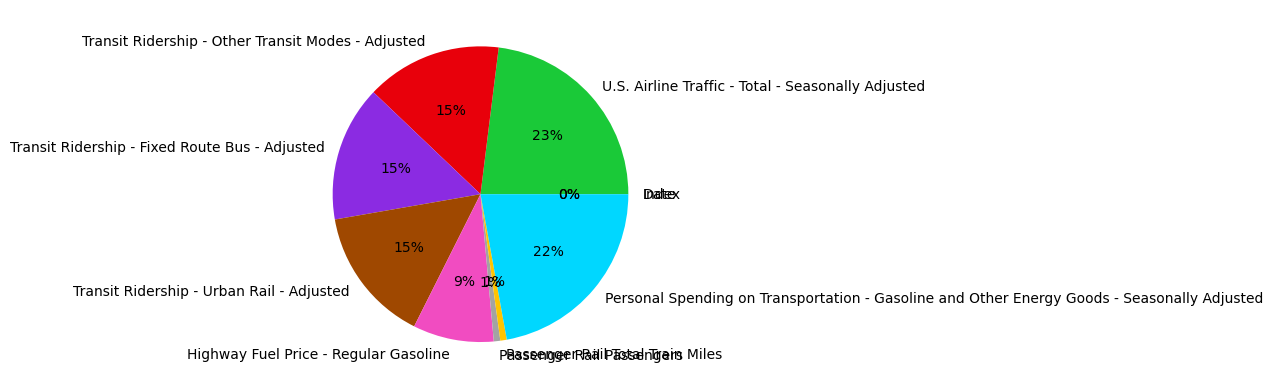

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


transportation_df = pd.read_csv('Monthly_Transportation_Statistics.csv')
gasprices_df = pd.read_csv('USGasanddieselprices.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
#print(list(transportation_df.columns))
transportation_df = transportation_df[['Index', 'Date', 'U.S. Airline Traffic - Total - Seasonally Adjusted', 'Transit Ridership - Other Transit Modes - Adjusted', 
'Transit Ridership - Fixed Route Bus - Adjusted', 'Transit Ridership - Urban Rail - Adjusted', 'Highway Fuel Price - Regular Gasoline', 'Passenger Rail Passengers', 
'Passenger Rail Total Train Miles', 'Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted']]
gasprices_df = gasprices_df[['Date', 'A1']]
#print(transportation_df.columns)
#print(gasprices_df.columns)
transportation_df['Date'] = pd.to_datetime(transportation_df['Date'])
gasprices_df['Date'] = pd.to_datetime(gasprices_df['Date'])
transportation_df = transportation_df.loc[transportation_df['Date'] >= '01-01-1975']
display(transportation_df.shape)


total_nan = 0
for curr in range(0, len(transportation_df.columns)):
    print("Column: ", transportation_df.columns[curr] , "----- Number of NaN: ", transportation_df.iloc[:, curr].isnull().sum())
    total_nan += transportation_df.iloc[:, curr].isnull().sum()

print('Total NaN: ', total_nan)
print('Gas Prices Missing:  ', gasprices_df.loc[:, 'A1'].isnull().sum())

#print(transportation_df.isna().sum())

colors = sns.color_palette('bright')[0:10]
plt.pie(x = transportation_df.isna().sum(), labels = transportation_df.isna().sum().index, colors = colors, autopct='%.0f%%')

#gasprices_df.head


    

We have two datasets, one is for transportation, another is for gas prices specifically. As the chart above demonstrates, there is a lot of data missing in the transportation dataframe especially from airline traffic and personal spending on transportation. Looking at the dataframes themselves, one can notice that for all missing data, the data is not missing after a certain date, meaning that the data is missing not at random (MNAR) because there is a clear time frame where the data is missing. In fact, none of the choosen columns have any data before 1975. The gas dataframe on the other hand, has no prices missing as we are using the "All Grades All Formulations Gasoline Prices" column only for simplicity. 

In [304]:
# List only the data columns that can be NaN (exclude 'Index' and 'Date')
cols = [
    'U.S. Airline Traffic - Total - Seasonally Adjusted',
    'Transit Ridership - Other Transit Modes - Adjusted',
    'Transit Ridership - Fixed Route Bus - Adjusted',
    'Transit Ridership - Urban Rail - Adjusted',
    'Highway Fuel Price - Regular Gasoline',
    'Passenger Rail Passengers',
    'Passenger Rail Total Train Miles',
    'Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted'
]
print(transportation_df[cols].isna().sum())
print(transportation_df.shape)
# Drop rows where all specified columns are NaN
transportation_df = transportation_df.dropna(subset=cols, how='all')
print(transportation_df[cols].isna().sum())
print(transportation_df.shape)



U.S. Airline Traffic - Total - Seasonally Adjusted                                             521
Transit Ridership - Other Transit Modes - Adjusted                                             336
Transit Ridership - Fixed Route Bus - Adjusted                                                 336
Transit Ridership - Urban Rail - Adjusted                                                      336
Highway Fuel Price - Regular Gasoline                                                          200
Passenger Rail Passengers                                                                       16
Passenger Rail Total Train Miles                                                                16
Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted    501
dtype: int64
(588, 10)
U.S. Airline Traffic - Total - Seasonally Adjusted                                             513
Transit Ridership - Other Transit Modes - Adjusted                                    

The dates for which all eight of those data columns are simultaneously missing will be dropped since they will not give us any information.

In [305]:
'''
either_missing = transportation_df.loc[
    transportation_df[rail_cols].isna().any(axis=1), 'Date'
]
print("Either rail column is NaN on:")
print(either_missing.dt.date.to_list())
df = transportation_df.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# The two columns you want to plot
rail_cols = [
    'Passenger Rail Passengers',
    'Passenger Rail Total Train Miles'
]

plt.figure()
for col in rail_cols:
    plt.plot(df.index, df[col], label=col)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Passenger Rail Usage Over Time')
plt.legend()
plt.tight_layout()
plt.show()
'''

rail_cols = [
    'Passenger Rail Passengers',
    'Passenger Rail Total Train Miles'
]
# Fill NaN values in the rail columns with forward and backward fill
transportation_df[rail_cols] = (transportation_df[rail_cols].ffill().bfill())
print(transportation_df[rail_cols].isna().sum())



Passenger Rail Passengers           0
Passenger Rail Total Train Miles    0
dtype: int64


Since the number of NaNs is only 8, we use the nearest value to imputate the NaNs for the above two fields.

In [306]:

col = 'Highway Fuel Price - Regular Gasoline'
'''
missing_hwy_dates = (
    transportation_df.loc[transportation_df[col].isna(), 'Date']
                     .sort_values()
                     .unique()
)


blocks = []
start = prev = missing_hwy_dates[0]
count = 1

for cur in missing_hwy_dates[1:]:
    if cur == prev + pd.DateOffset(months=1):
        prev = cur
        count += 1
    else:
        blocks.append((start.date(), prev.date(), count))
        start = prev = cur
        count = 1


blocks.append((start.date(), prev.date(), count))


for i, (bstart, bend, cnt) in enumerate(blocks, 1):
    print(f"Block {i}: from {bstart} through {bend}  ->  {cnt} months")'''

start, end = '1975-01-01', '1990-08-01'
c_hwy = (transportation_df['Date'] >= start) & (transportation_df['Date'] <= end)
df_pre1990 = transportation_df.loc[c_hwy].copy()
df_pre1990 = df_pre1990.dropna(axis=1, how='all')
print(df_pre1990.shape)
print("Remaining columns:", list(df_pre1990.columns))
print(df_pre1990.isna().sum())

(188, 4)
Remaining columns: ['Index', 'Date', 'Passenger Rail Passengers', 'Passenger Rail Total Train Miles']
Index                               0
Date                                0
Passenger Rail Passengers           0
Passenger Rail Total Train Miles    0
dtype: int64


Since most of the columns have all NaNs in from the period of 1975 to 1990, we create a seperate data (df_pre1990) frame during that time. Columns where all values are NaNs are dropeed and the other NaNs 

In [307]:
cols = [
  'Transit Ridership - Other Transit Modes - Adjusted',
  'Transit Ridership - Fixed Route Bus - Adjusted',
  'Transit Ridership - Urban Rail - Adjusted'
]
mask_all = transportation_df[cols].isna().all(axis=1)
dates = transportation_df.loc[mask_all, 'Date'].sort_values().unique()
blocks = []
start = prev = dates[0]
for d in dates[1:]:
    if d == prev + pd.DateOffset(months=1):
        prev = d
    else:
        blocks.append((start, prev))
        start = prev = d
blocks.append((start, prev))
pd.set_option('display.max_rows', None)
#print(dates)
#print("Missing blocks:", blocks)

start, end = '1990-09-01', '2001-12-01'
mask = (transportation_df['Date'] >= start) & (transportation_df['Date'] <= end)
df_pre2002 = transportation_df.loc[mask].copy()

df_pre2002 = df_pre2002.dropna(axis=1, how='all')

print(df_pre2002.shape)
print("Remaining columns:", list(df_pre2002.columns))
df_pre2002 = df_pre2002.ffill().bfill()
#print(df_pre2002)
print(df_pre2002.isna().sum())

(136, 5)
Remaining columns: ['Index', 'Date', 'Highway Fuel Price - Regular Gasoline', 'Passenger Rail Passengers', 'Passenger Rail Total Train Miles']
Index                                    0
Date                                     0
Highway Fuel Price - Regular Gasoline    0
Passenger Rail Passengers                0
Passenger Rail Total Train Miles         0
dtype: int64


All three transit‐ridership columns in transportation_df share the same missing‐value dates. In other words, none of these series exist before a common “start date.” Moreover, the NaNs are grouped from 1990-01-01 to 2001-12-01 and then from 2023-01-01 to 2023-07-01. Thus, we make a seperate data frame to analyse the data in this period. All the remaining NaNs are handled using imputation from the nearest neighbour.

In [308]:
'''col = 'Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted'
missing_spend_dates = transportation_df.loc[transportation_df[col].isna(), 'Date'].sort_values().unique()
# Identify the blocks of consecutive months with missing data
blocks = []
start = missing_spend_dates[0]
prev = missing_spend_dates[0]
count=1
for cur in missing_spend_dates[1:]:
    if cur == prev + pd.DateOffset(months=1):
        prev = cur
        count += 1
    else:
        blocks.append((start.date(), prev.date(), count))
        start = prev = cur
        count = 1

# append the last block
blocks.append((start.date(), prev.date(), count))

# 3. Print every block with its month‐count
for i, (bstart, bend, cnt) in enumerate(blocks, 1):
    print(f"Block {i}: from {bstart} through {bend}  ->  {cnt} months")'''

start_mid, end_mid = '2002-01-01', '2016-12-01'

mask_mid = (transportation_df['Date'] >= start_mid) & (transportation_df['Date'] <= end_mid)
df_2002_2016 = transportation_df.loc[mask_mid].copy()

df_2002_2016 = df_2002_2016.dropna(axis=1, how='all')

print("Shape:", df_2002_2016.shape)
print("Columns remaining:", df_2002_2016.columns.tolist())
print(df_2002_2016.isna().sum())

Shape: (180, 9)
Columns remaining: ['Index', 'Date', 'Transit Ridership - Other Transit Modes - Adjusted', 'Transit Ridership - Fixed Route Bus - Adjusted', 'Transit Ridership - Urban Rail - Adjusted', 'Highway Fuel Price - Regular Gasoline', 'Passenger Rail Passengers', 'Passenger Rail Total Train Miles', 'Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted']
Index                                                                                            0
Date                                                                                             0
Transit Ridership - Other Transit Modes - Adjusted                                               0
Transit Ridership - Fixed Route Bus - Adjusted                                                   0
Transit Ridership - Urban Rail - Adjusted                                                        0
Highway Fuel Price - Regular Gasoline                                                            0
Pas

In [309]:

col = 'U.S. Airline Traffic - Total - Seasonally Adjusted'

missing_air_dates = (
    transportation_df.loc[transportation_df[col].isna(), 'Date']
                     .sort_values()
                     .unique()
)

# 2. Identify contiguous blocks and count their lengths
blocks = []
start = prev = missing_air_dates[0]
count = 1

for cur in missing_air_dates[1:]:
    if cur == prev + pd.DateOffset(months=1):
        prev = cur
        count += 1
    else:
        blocks.append((start.date(), prev.date(), count))
        start = prev = cur
        count = 1

# append the final block
blocks.append((start.date(), prev.date(), count))

# 3. Print every block with its month‐count
#for i, (bstart, bend, cnt) in enumerate(blocks, 1):
    #print(f"Block {i}: from {bstart} through {bend}  →  {cnt} months")

cutoff = '2016-12-01'

df_post2016 = transportation_df.loc[transportation_df['Date'] > cutoff].copy()

df_post2016 = df_post2016.dropna(axis=1, how='all')

df_post2016 = df_post2016.ffill().bfill()

print(df_post2016.shape)
print("Columns remaining:", df_post2016.columns.tolist())
#print(df_post2016)
#print(df_post2016.isna().sum())

(76, 10)
Columns remaining: ['Index', 'Date', 'U.S. Airline Traffic - Total - Seasonally Adjusted', 'Transit Ridership - Other Transit Modes - Adjusted', 'Transit Ridership - Fixed Route Bus - Adjusted', 'Transit Ridership - Urban Rail - Adjusted', 'Highway Fuel Price - Regular Gasoline', 'Passenger Rail Passengers', 'Passenger Rail Total Train Miles', 'Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted']
